In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from fnmatch import fnmatch
import seaborn as sns
import random
# https://github.com/Phlya/adjustText
from adjustText import adjust_text
sns.set(style="whitegrid")

In [16]:
# K : number of folds in KFolds
K = 5
# R : number repetition of KFolds
R = 5
# RHO : levels of noised applied on training datasets (symmetrical noise, same noise applied on all classes)
# function of the minority class : rho*balance (0.0 : imbalanced, ]0.0, 1.0] : noise<=balance, ]1.0, 2.0] : noise > balance)
RHO = [0.0, 0.05, 0.1, 0.20, 0.25, 0.33, 0.5, 0.66, 0.75, 0.9, 1.0, 1.25]

# other constants
pseudo_index = ["name", "model", "rho", "i"]
CARACS = pd.read_json(os.path.join("Cleaned_Datasets", "caracs.json"))
RESULTS = "./Results/"
DATASETS = [RESULTS+f for i, f in enumerate(os.listdir(RESULTS)) if fnmatch(f, "*{}x{}x{}.csv".format(R, K, len(RHO)))]

# loading full results of the protocol
results = pd.concat([pd.read_csv(d) for d in DATASETS[:]]).drop_duplicates(subset=pseudo_index)
results = results.sort_values(pseudo_index).drop(['train_prauc', 'test_prauc'], axis=1)
results

,name,model,rho,i,time,train_rocauc,test_rocauc,train_bacc,test_bacc,train_kappa,test_kappa
40,adult_full,XGB_HINGE,0.00,0,26.416768,0.803969,0.785232,0.803969,0.785232,0.651630,0.611707
172,adult_full,XGB_HINGE,0.00,1,25.908995,0.788130,0.779775,0.788130,0.779775,0.632821,0.612716
292,adult_full,XGB_HINGE,0.00,2,27.579394,0.806892,0.790293,0.806892,0.790293,0.656522,0.622297
412,adult_full,XGB_HINGE,0.00,3,24.125021,0.800109,0.782757,0.800109,0.782757,0.647905,0.611039
520,adult_full,XGB_HINGE,0.00,4,24.229735,0.806343,0.780831,0.806343,0.780831,0.658498,0.607745
...,...,...,...,...,...,...,...,...,...,...,...
1943,trucks_full,wekaRF,1.25,20,74.442083,1.000000,0.987699,0.999390,0.827727,0.999364,0.653122
1955,trucks_full,wekaRF,1.25,21,84.816529,1.000000,0.981035,0.999795,0.873114,0.999787,0.709507
2051,trucks_full,wekaRF,1.25,22,101.686970,1.000000,0.983041,0.998972,0.869612,0.998928,0.710076
2087,trucks_full,wekaRF,1.25,23,91.911297,1.000000,0.980611,0.999795,0.850827,0.999787,0.664870


In [17]:
# calcualtion performance kept with respect to rho=0 metric over all results
r = results.drop(["time"], axis=1).set_index(["name", "model", "i", "rho"])
r[["train_kappa", "test_kappa"]] = r[["train_kappa", "test_kappa"]]+1
perfkept = pd.DataFrame({i : d/r.loc[i[:3]+tuple([0.0])] for i, d in r.iterrows()}).T.reset_index()
perfkept.rename(columns={old : new for old, new in zip(perfkept.columns, ["name", "model", "i", "rho"])}, inplace=True) 
perfkept.head()

,name,model,i,rho,train_rocauc,test_rocauc,train_bacc,test_bacc,train_kappa,test_kappa
0,adult_full,XGB_HINGE,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,adult_full,XGB_HINGE,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,adult_full,XGB_HINGE,2,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,adult_full,XGB_HINGE,3,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,adult_full,XGB_HINGE,4,0.0,1.0,1.0,1.0,1.0,1.0,1.0


(0, 10.5)

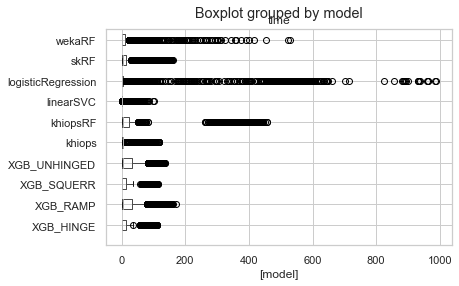

In [19]:
# boxplot of average computing time ( may be falsened by multi processing implementation )
results[["model", "time", "name"]].boxplot(by="model", vert=False)
plt.ylim(bottom=0)


    \begin{figure}[h]
    \makebox[\textwidth][c]{
      \includegraphics[width=1.3\textwidth]{../Figures/mean_results/mean_adult_full}
    }
    \caption{ Dataset : adult_full with minority class representing 23.93% }
    \label{fig:mean_adult_full}
    \end{figure}
    
    \begin{figure}[h]
    \makebox[\textwidth][c]{
      \includegraphics[width=1.3\textwidth]{../Figures/mean_results/mean_bank_full}
    }
    \caption{ Dataset : bank_full with minority class representing 11.27% }
    \label{fig:mean_bank_full}
    \end{figure}
    
    \begin{figure}[h]
    \makebox[\textwidth][c]{
      \includegraphics[width=1.3\textwidth]{../Figures/mean_results/mean_breastcancer_full}
    }
    \caption{ Dataset : breastcancer_full with minority class representing 34.48% }
    \label{fig:mean_breastcancer_full}
    \end{figure}
    
    \begin{figure}[h]
    \makebox[\textwidth][c]{
      \includegraphics[width=1.3\textwidth]{../Figures/mean_results/mean_eyestate_full}
    }
    \caption{ Dat

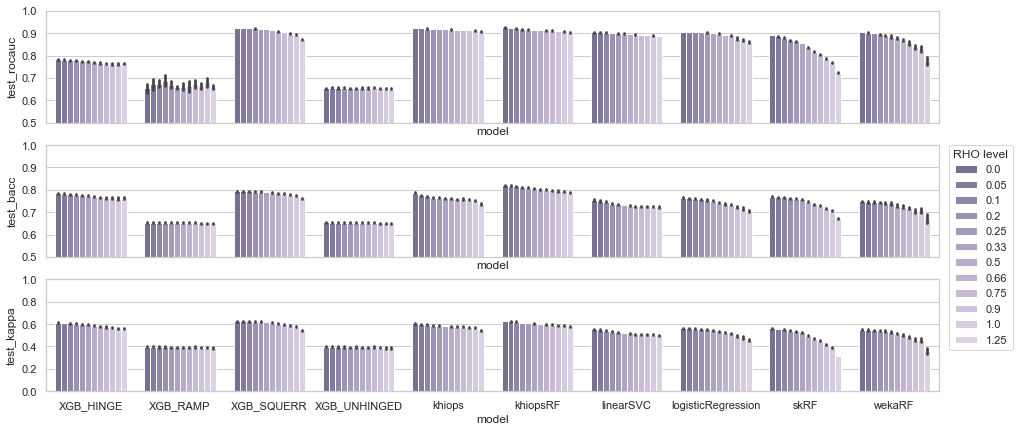

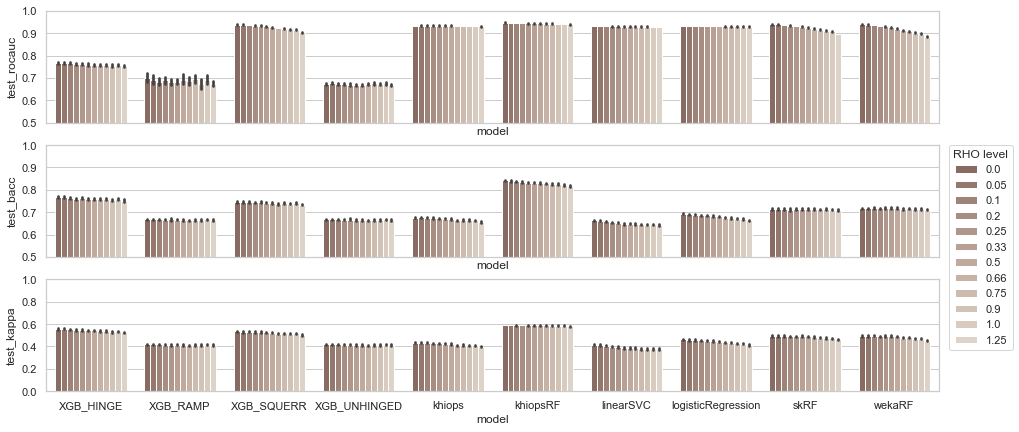

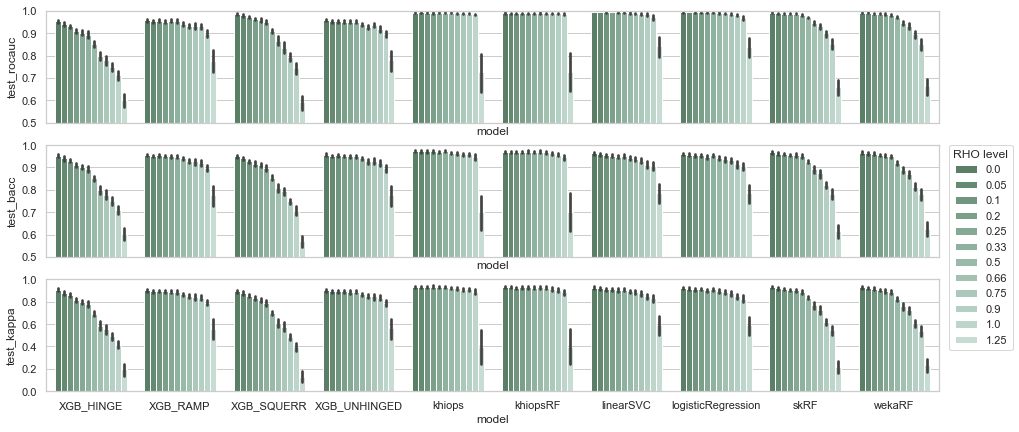

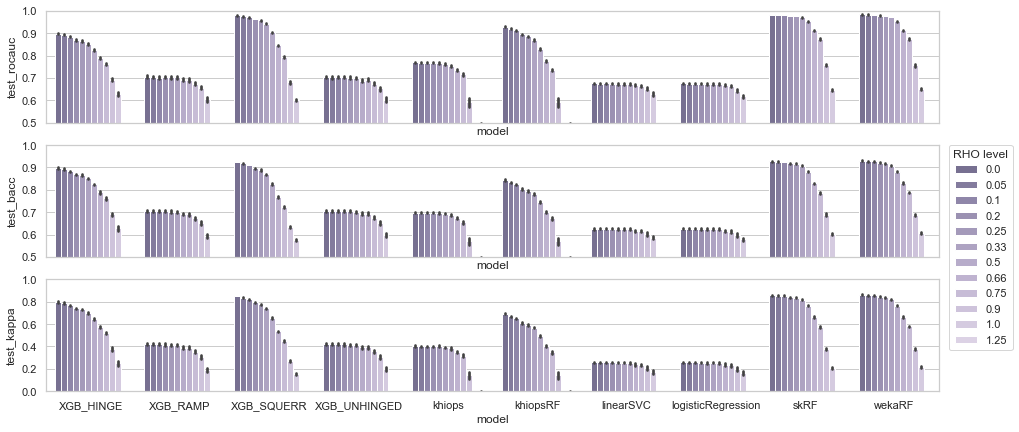

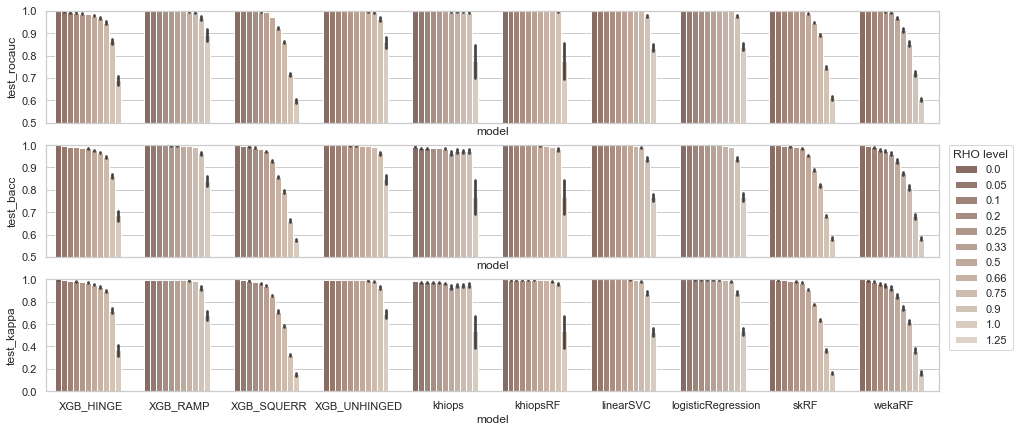

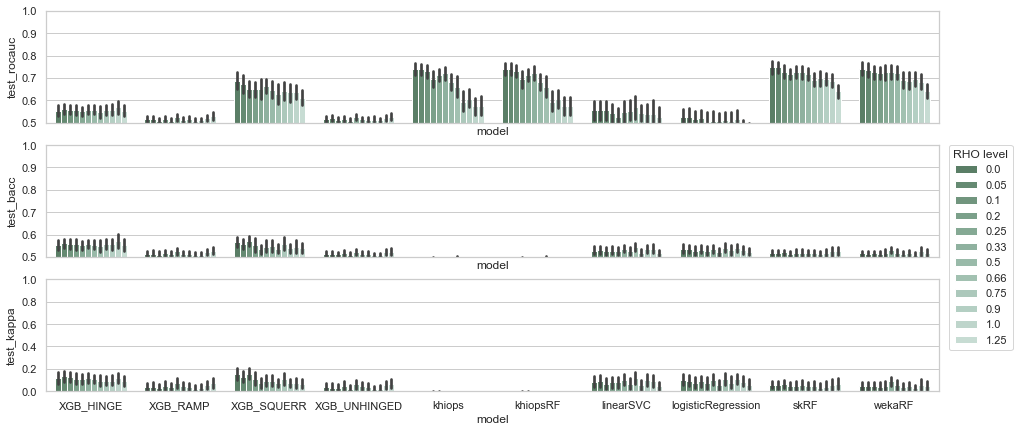

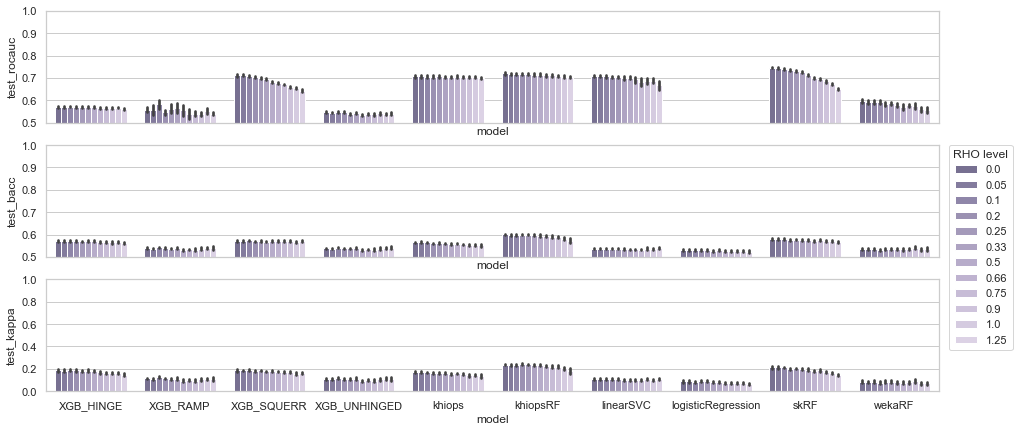

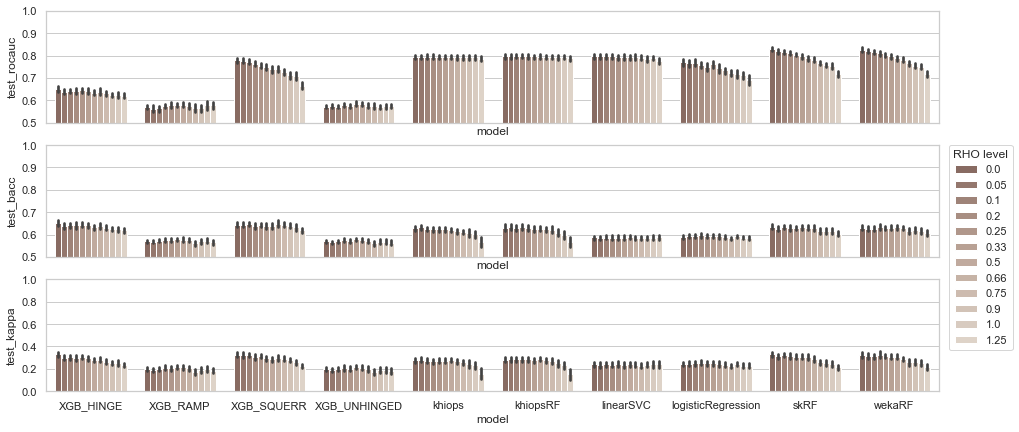

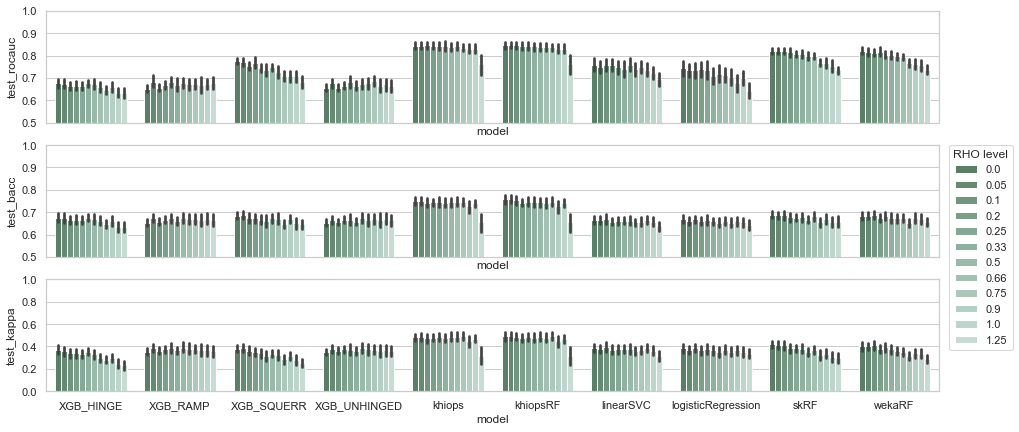

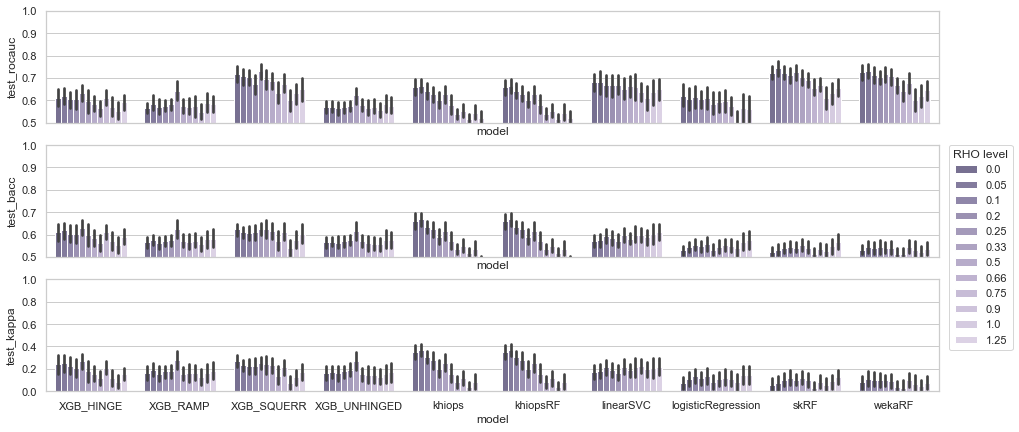

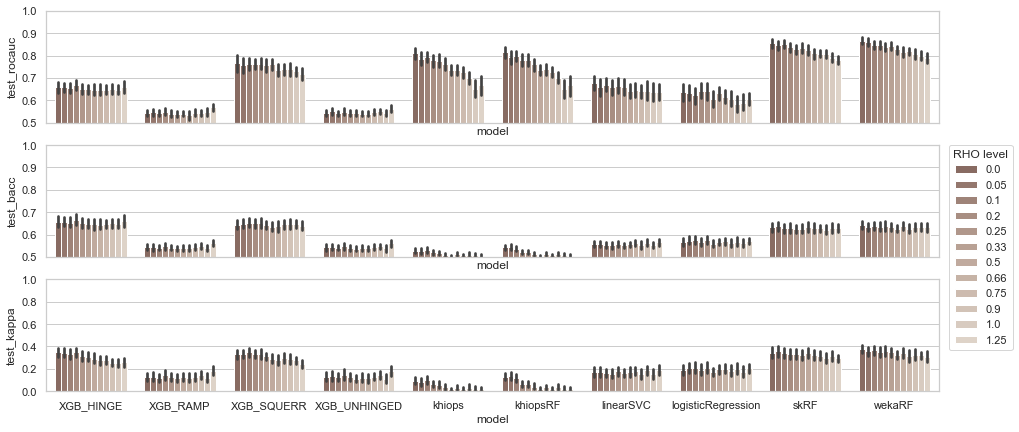

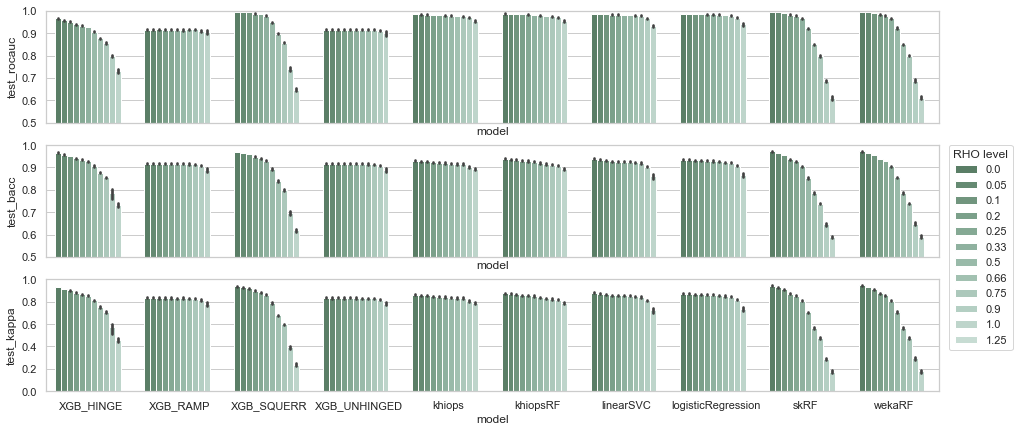

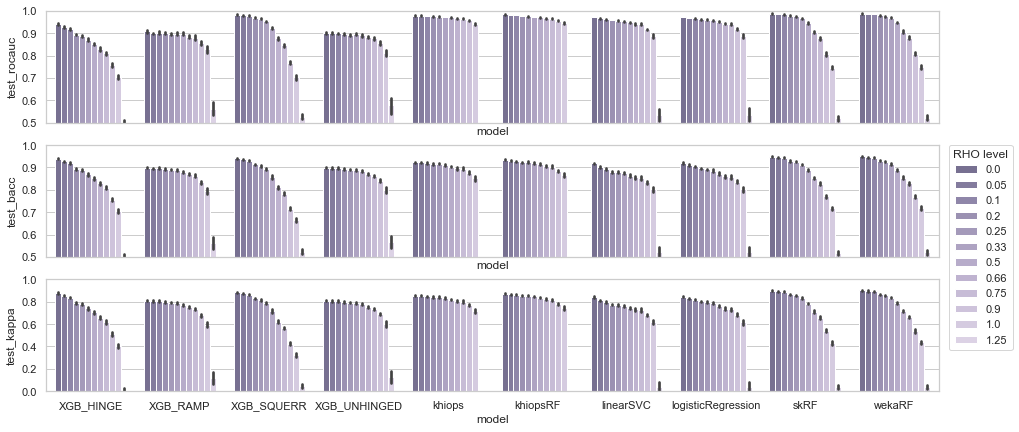

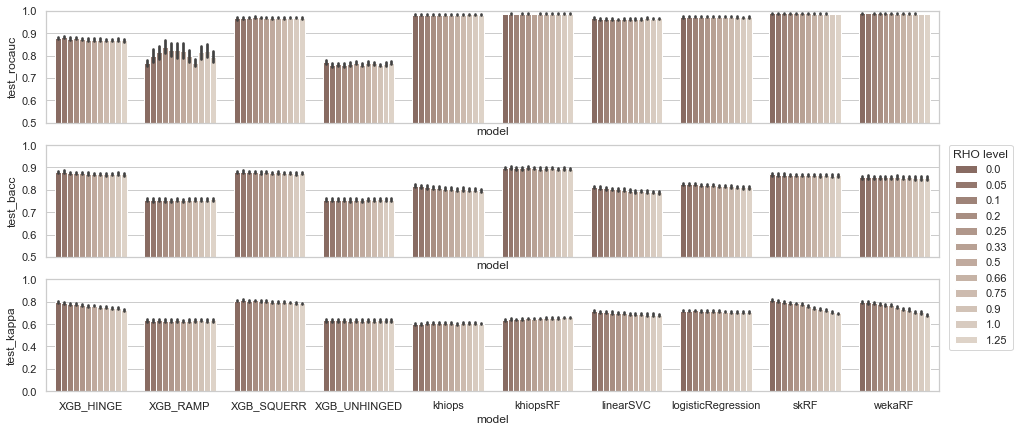

In [56]:
#display range
metrics = {"test_rocauc" : (0.5, 1), "test_bacc" : (0.5, 1), "test_kappa" : (0, 1)}

# plots aggregated results, stores to Results_img and automatically generates Latex code to be used (some errors have to be manually corrected)
latex = ""
for i, g in enumerate(results.groupby("name")):
    fig, axs = plt.subplots(3, sharex=True, figsize=(16, 7))
    #fig.suptitle("Dataset : {} with minority class representing {:4.2f}%".format(g[0], CARACS.loc[g[0], "minority_balance_percent"]))
    cmap = sns.cubehelix_palette(len(RHO), i, .1, .5, .6, .7, .2, reverse=True)
    for i, (m, yr) in enumerate(metrics.items()):
        axs[i].set(ylim=yr)
        lm = sns.barplot(x="model", y=m, hue="rho", data=g[1], palette=cmap, ax=axs[i])
    axs[1].legend(bbox_to_anchor=(1.005, 1.05), title="RHO level")
    axs[0].legend().set_visible(False)
    axs[2].legend().set_visible(False)
    plt.savefig("./Results_img/mean_{}.eps".format(g[0]), format="eps")
    
    latex += """
    \\begin{{figure}}[h]
    \\makebox[\\textwidth][c]{{
      \\includegraphics[width=1.3\\textwidth]{{../Figures/mean_results/mean_{}}}
    }}
    \\caption{{ {} }}
    \\label{{fig:mean_{}}}
    \\end{{figure}}
    """.format(g[0], "Dataset : {} with minority class representing {:4.2f}\%".format(g[0], CARACS.loc[g[0], "minority_balance_percent"]),g[0])
    
    plt.show()
    
print(latex)
    
    

Dataset : adult_full with minority class representing 23.93%


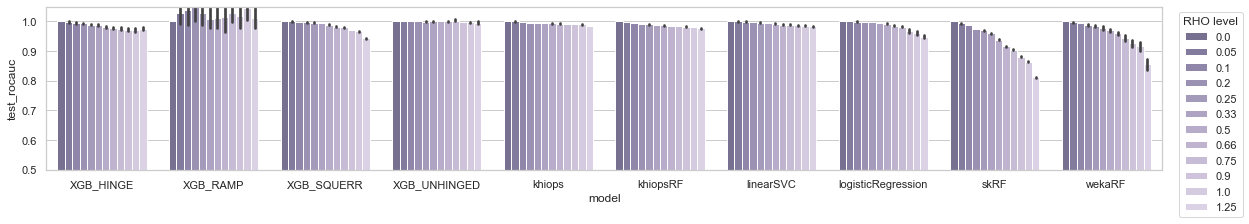

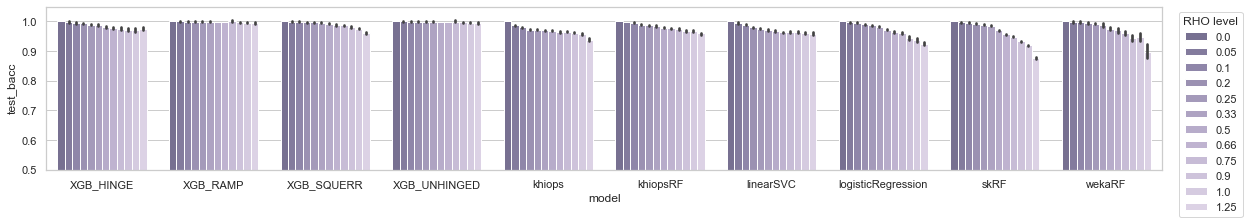

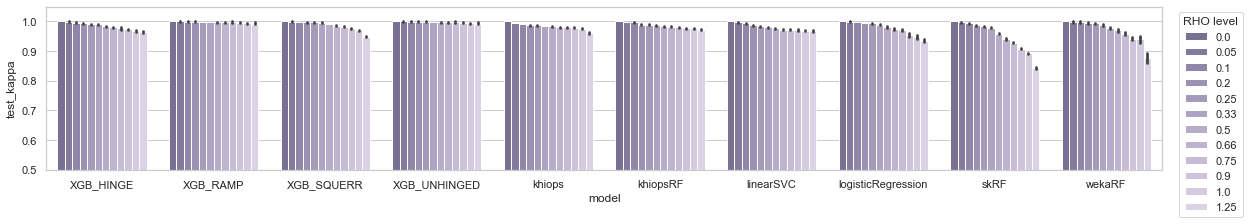

Dataset : bank_full with minority class representing 11.27%


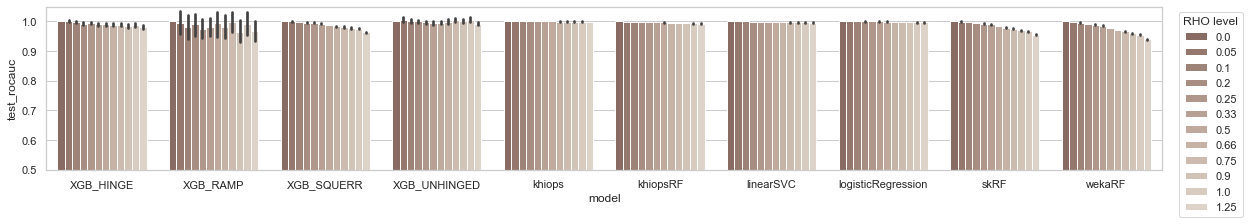

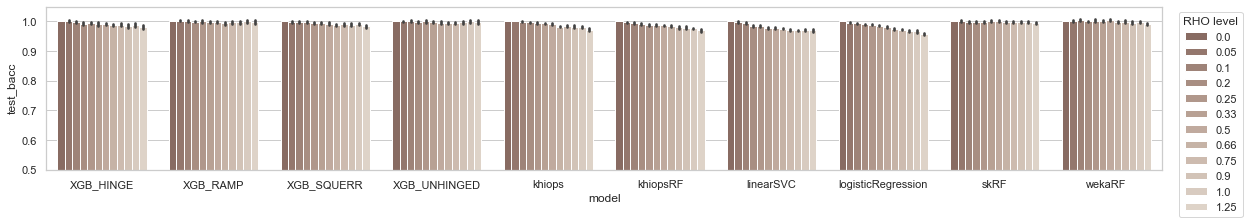

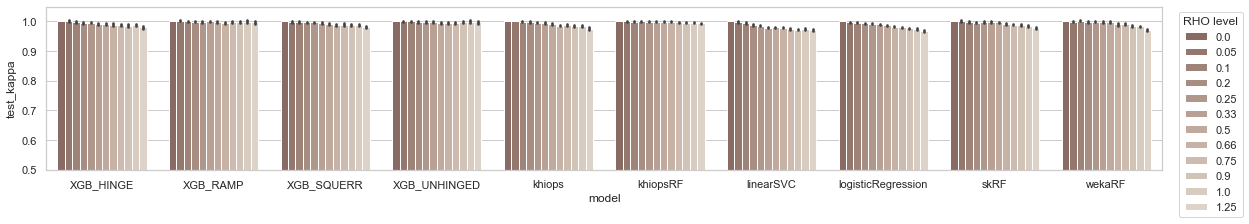

Dataset : breastcancer_full with minority class representing 34.48%


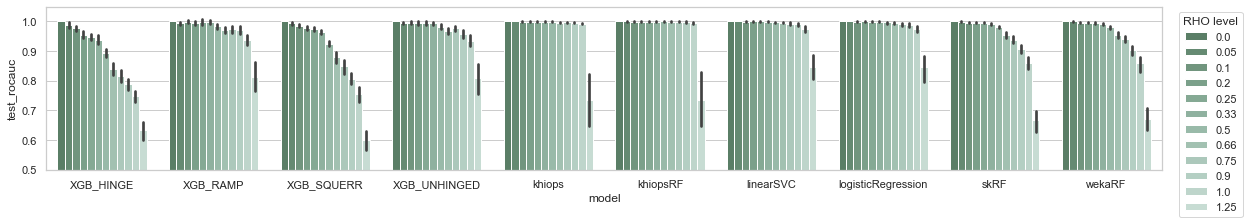

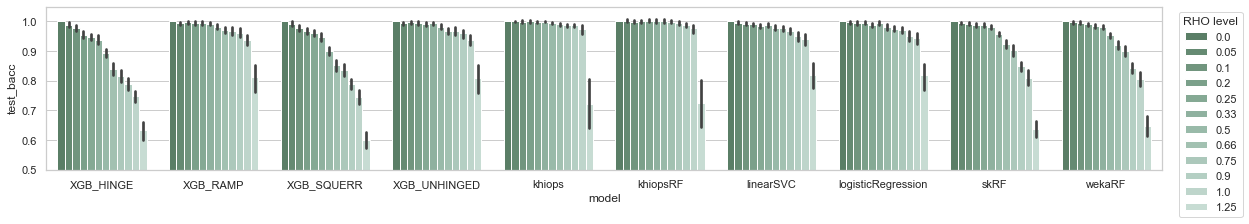

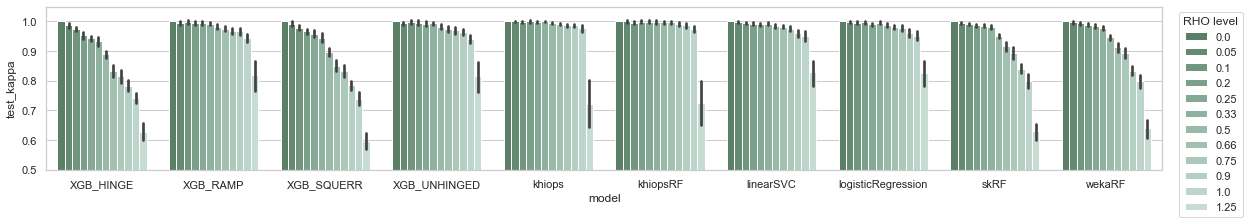

Dataset : eyestate_full with minority class representing 44.88%


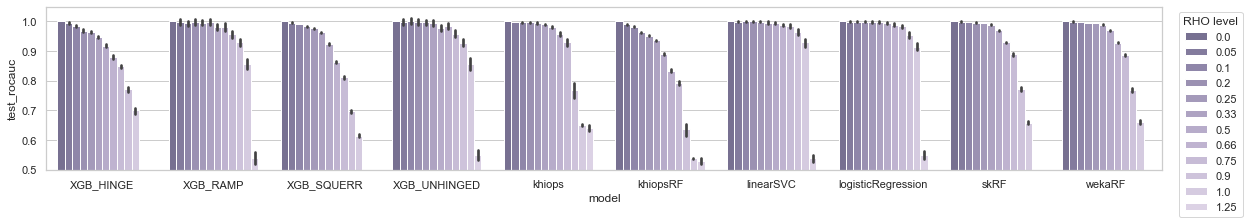

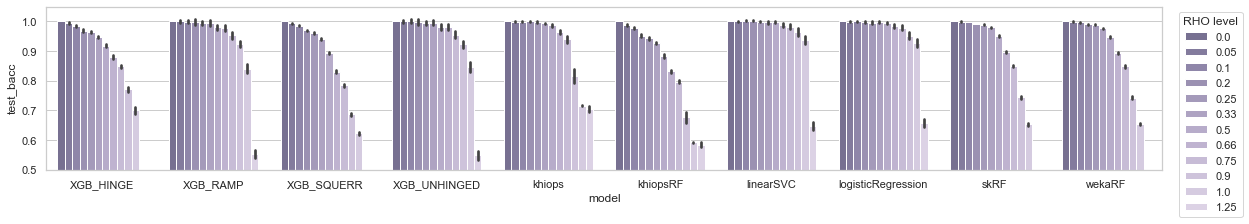

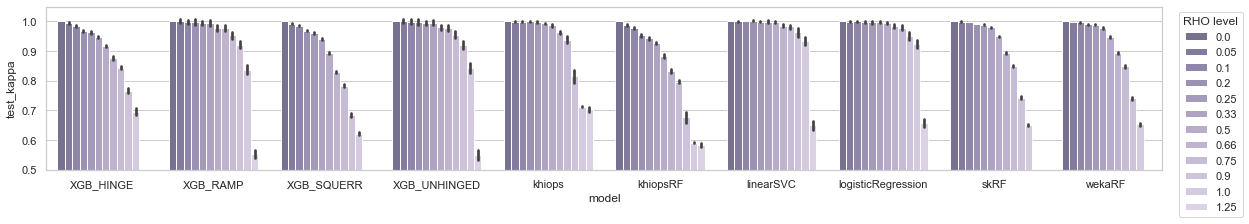

Dataset : mushroom_full with minority class representing 46.67%


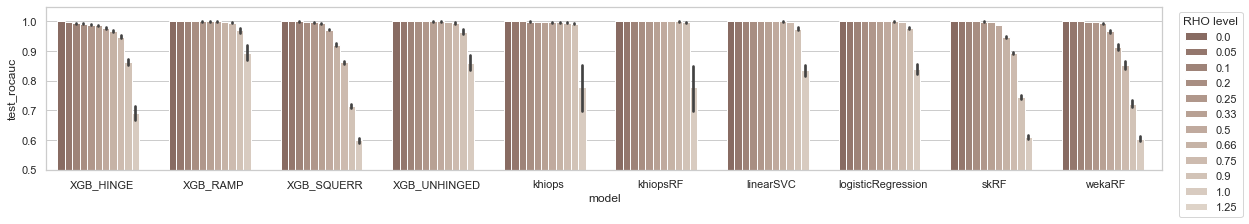

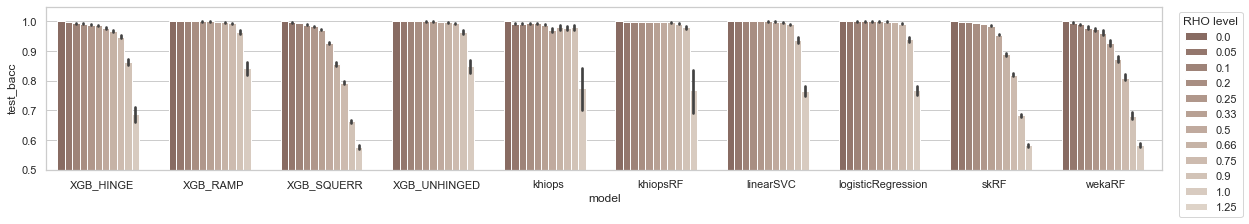

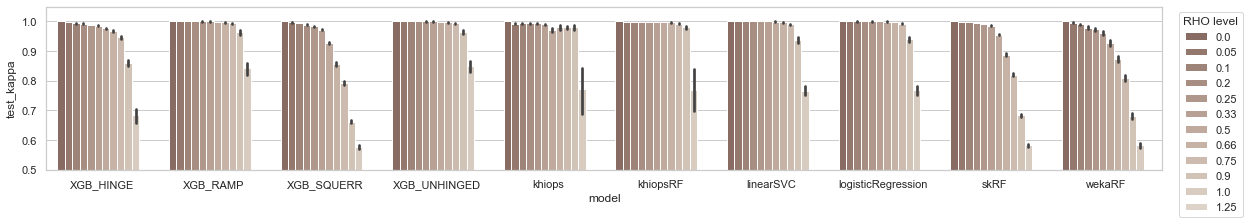

Dataset : nasa_cm1 with minority class representing 9.84%


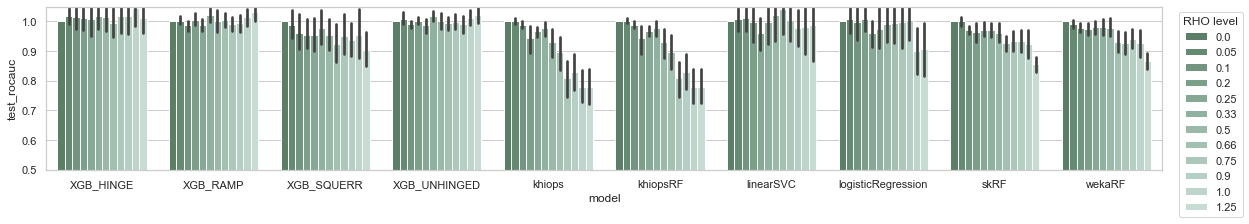

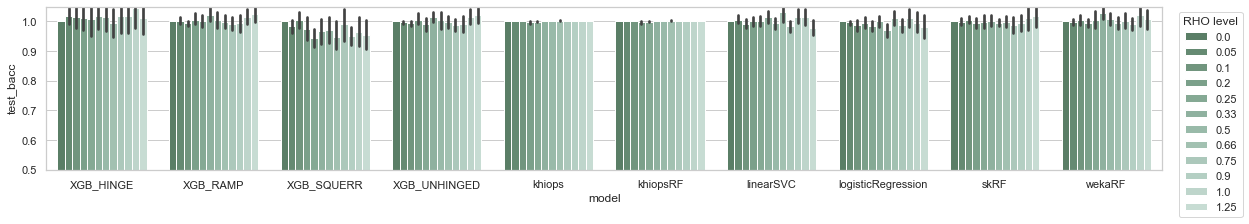

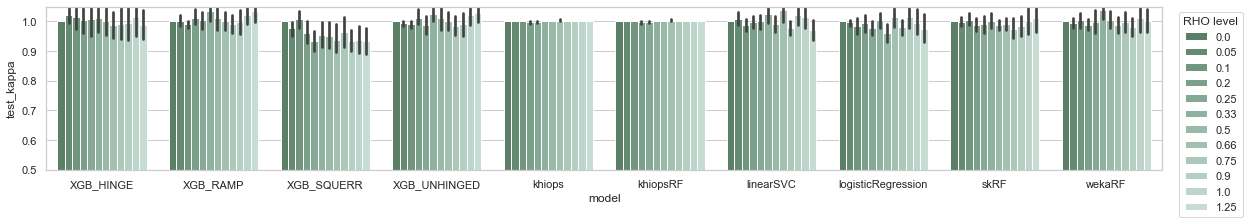

Dataset : nasa_jm1 with minority class representing 19.35%


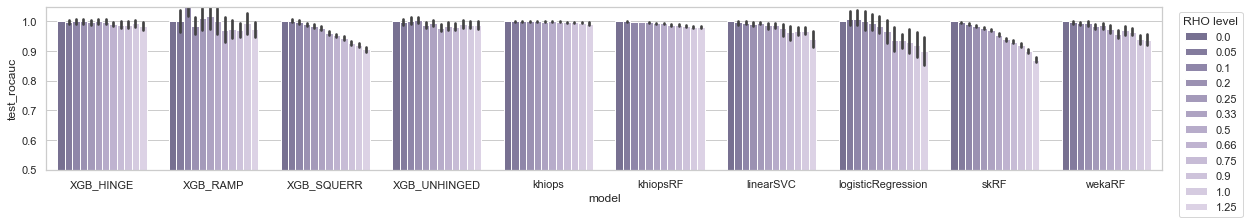

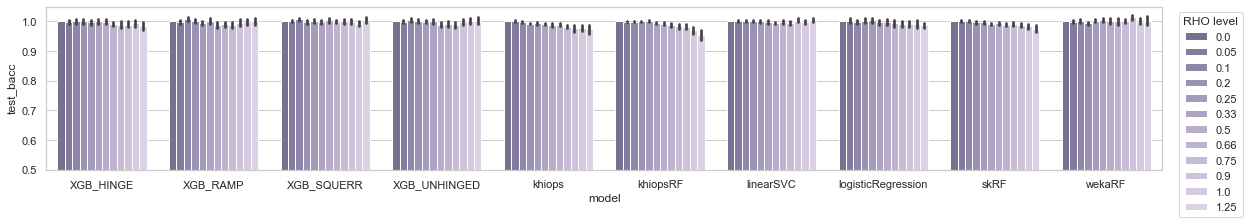

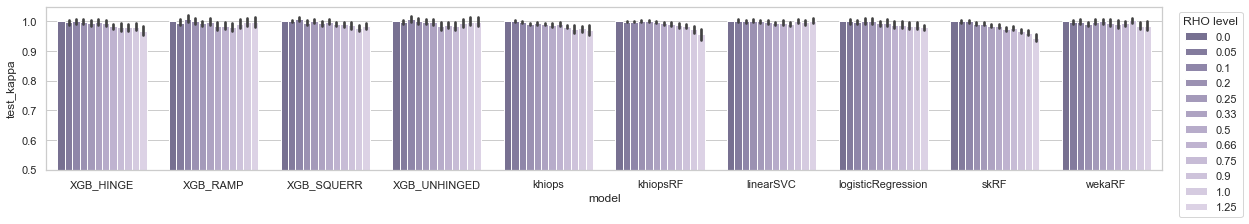

Dataset : nasa_kc1 with minority class representing 15.46%


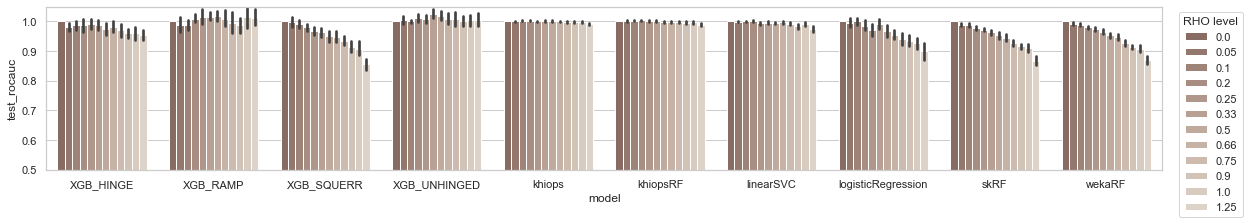

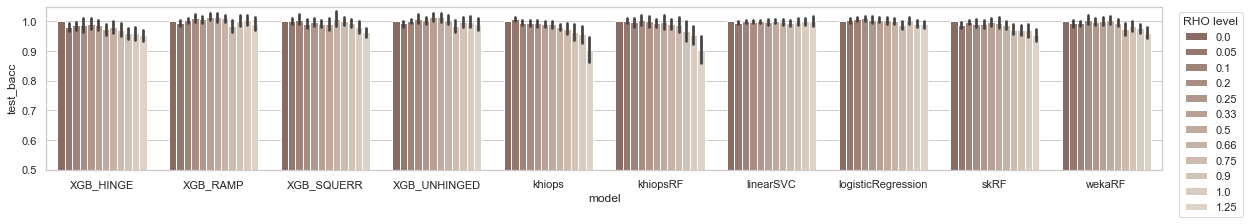

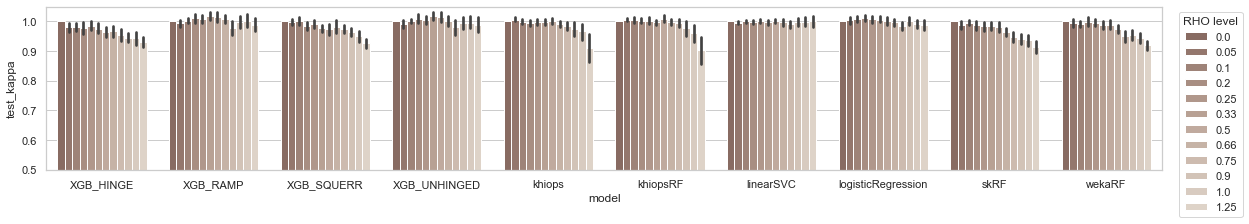

Dataset : nasa_kc2 with minority class representing 20.50%


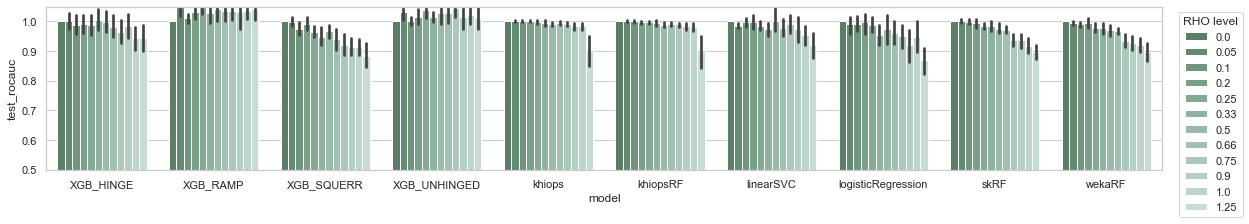

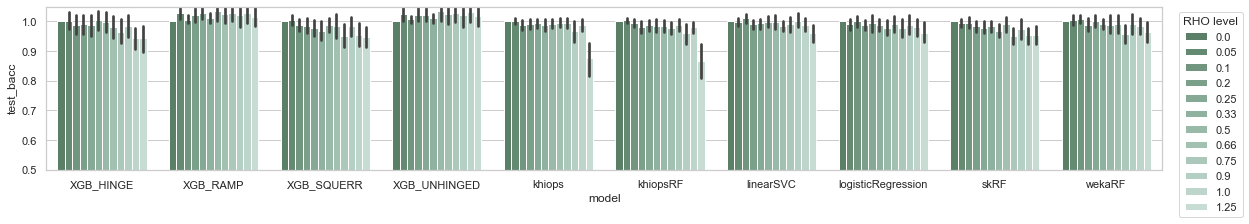

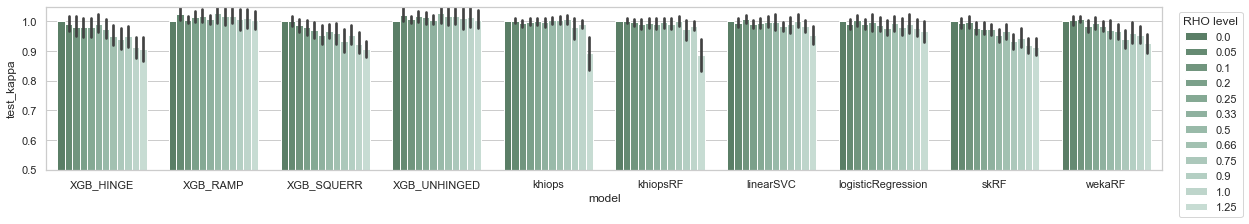

Dataset : nasa_kc3 with minority class representing 18.56%


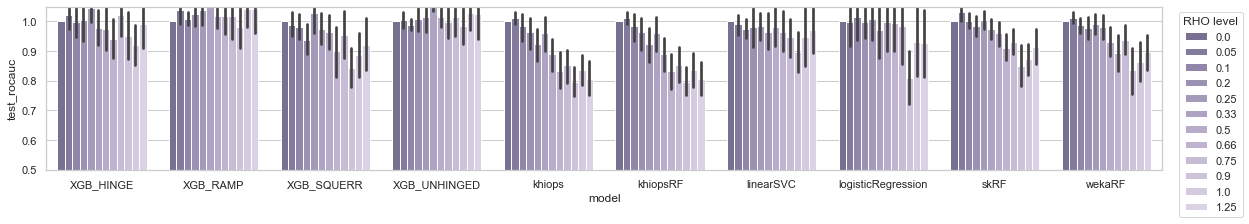

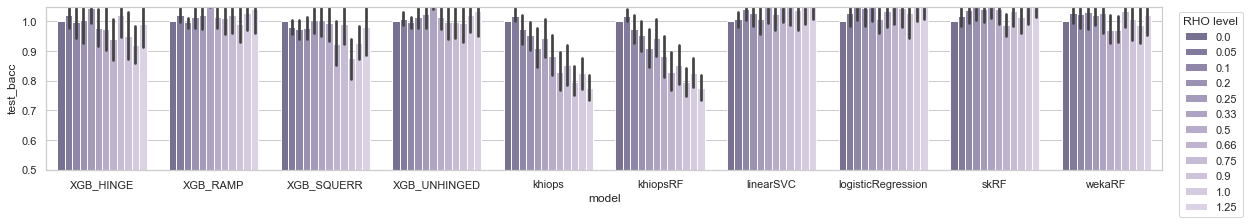

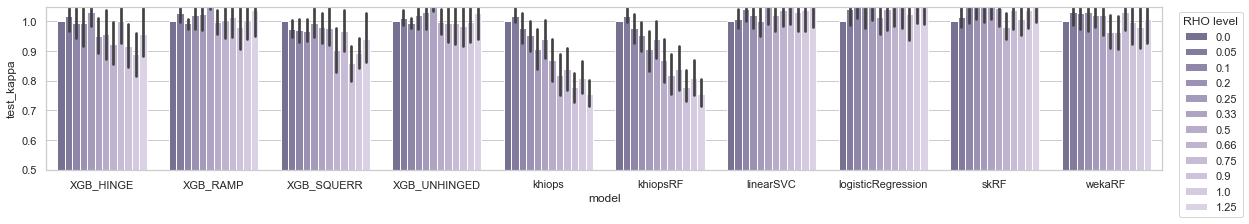

Dataset : nasa_pc1 with minority class representing 6.94%


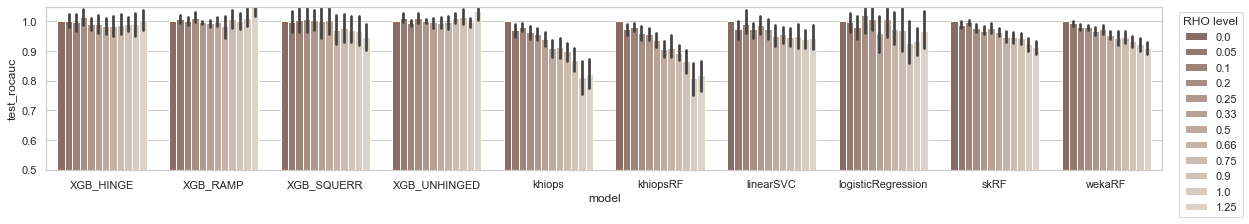

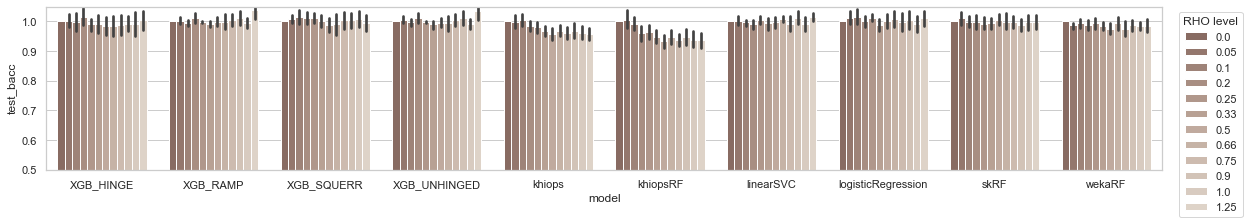

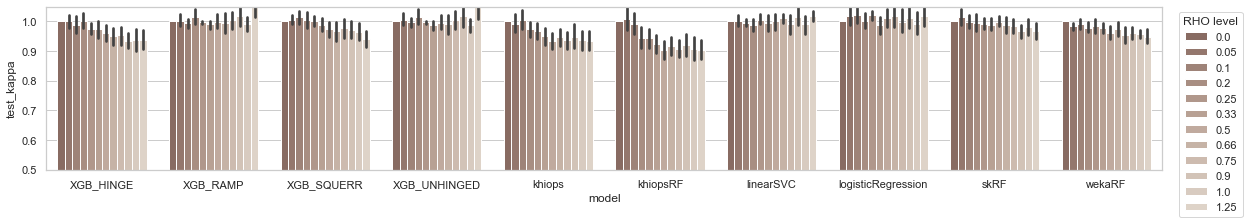

Dataset : phishing_full with minority class representing 44.31%


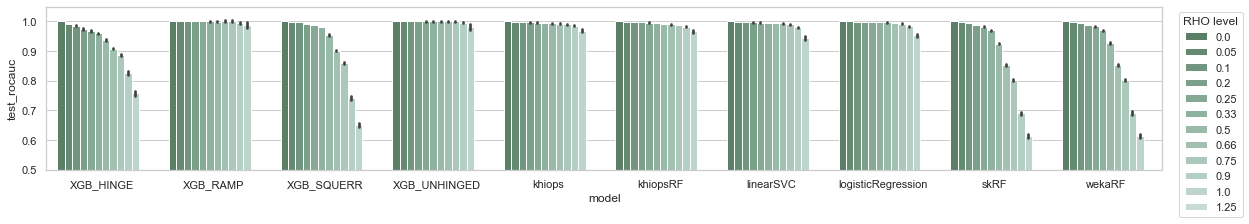

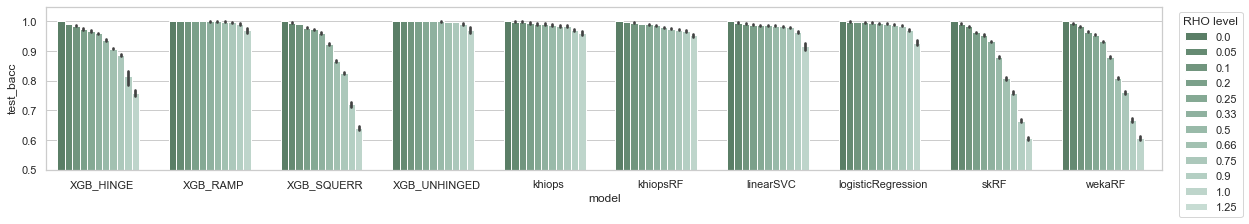

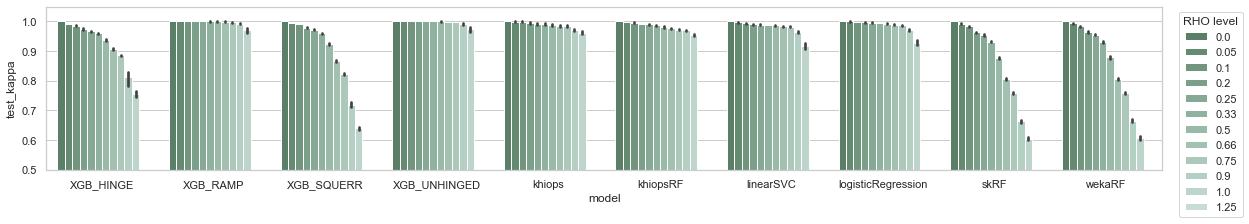

Dataset : spambase_full with minority class representing 39.40%


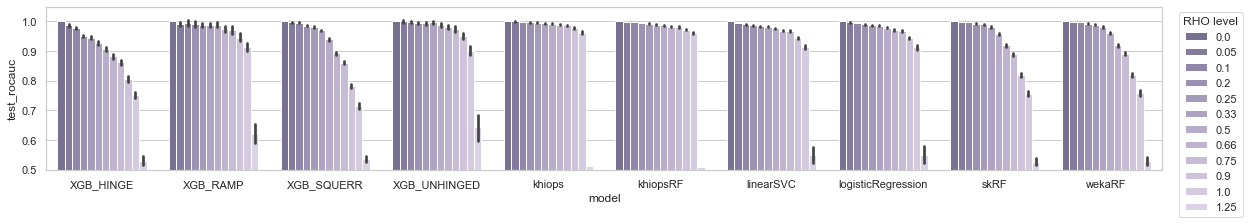

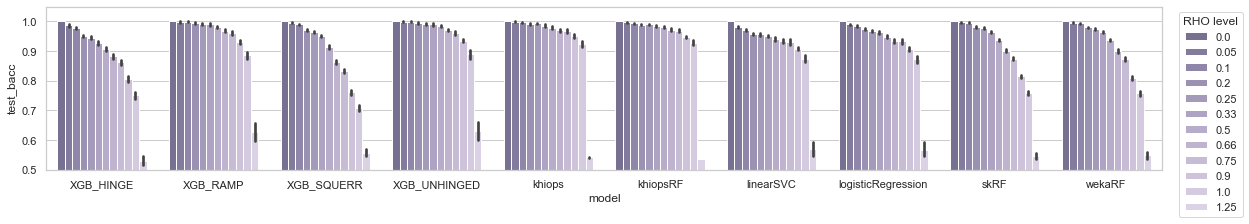

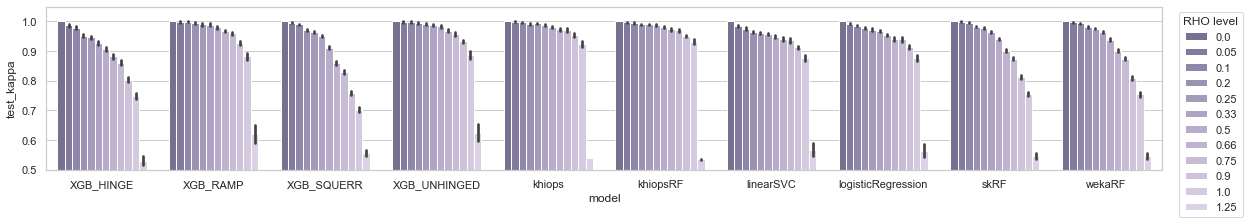

Dataset : trucks_full with minority class representing 1.81%


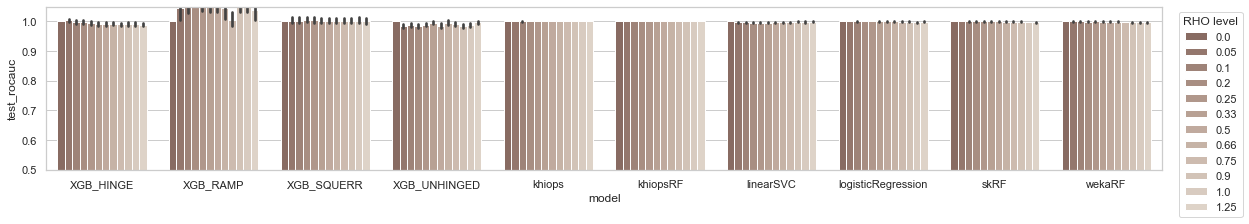

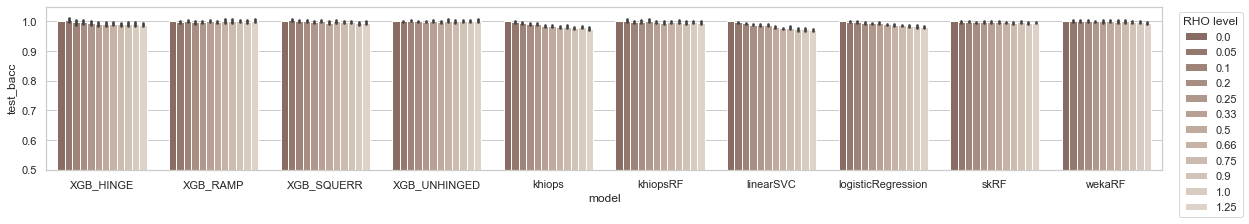

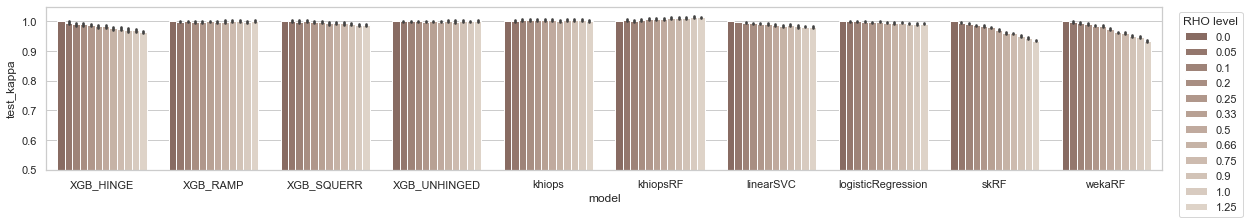

In [7]:
# plots perfkept aggregated results

metrics = ["test_rocauc", "test_bacc", "test_kappa"]
for i, g in enumerate(perfkept.groupby("name")):
    print("Dataset : {} with minority class representing {:4.2f}%".format(g[0], CARACS.loc[g[0], "minority_balance_percent"]))
    cmap = sns.cubehelix_palette(len(RHO), i, .1, .5, .6, .7, .2, reverse=True)
    for m in metrics:
        plt.figure(figsize=(20, 3))
        plt.ylim(0.5, 1.05)
        ax = sns.barplot(x="model", y=m, hue="rho", data=g[1], palette=cmap)
        ax.legend(bbox_to_anchor=(1.01, 1), title="RHO level")
        plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


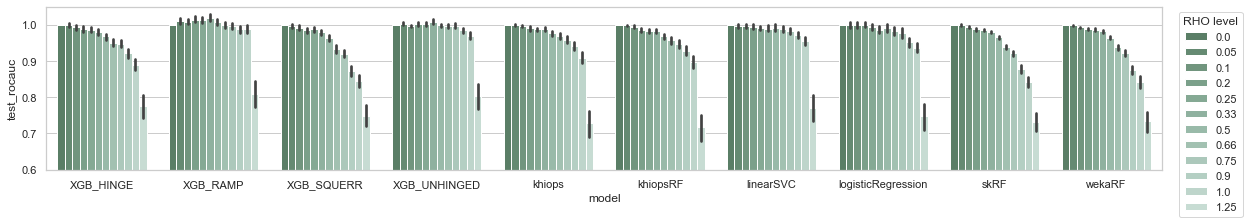

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


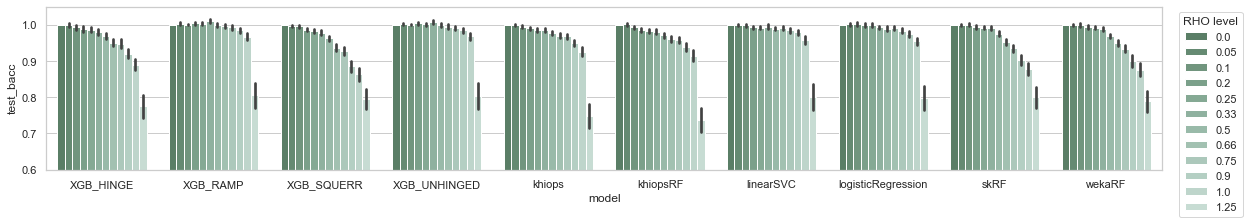

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


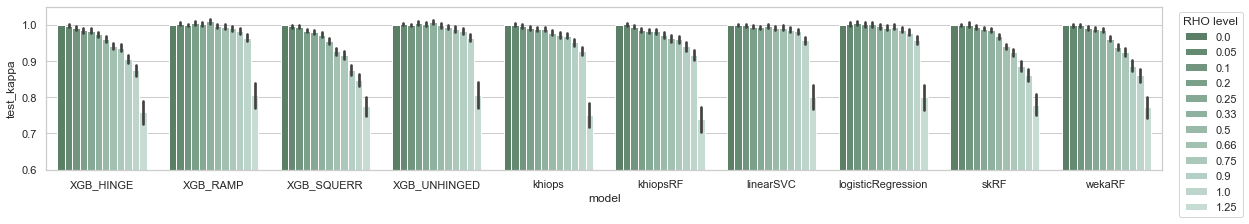

In [20]:
# plots perfkept averaged over all results results

metrics = ["test_rocauc", "test_bacc", "test_kappa"]
cmap = sns.cubehelix_palette(len(RHO), 2, .1, .5, .6, .7, .2, reverse=True)
for m in metrics:
    plt.figure(figsize=(20, 3))
    plt.ylim(0.6, 1.05)
    ax = sns.barplot(x="model", y=m, hue="rho", data=perfkept, palette=cmap)
    ax.legend(bbox_to_anchor=(1.01, 1), title="RHO level")
    plt.savefig("Results_img/perfkept.eps", format="eps")
    plt.show()


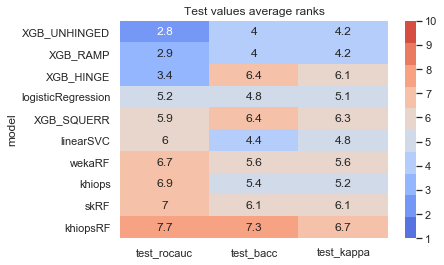

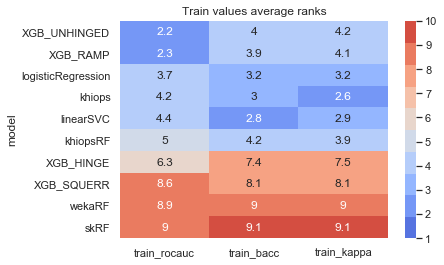

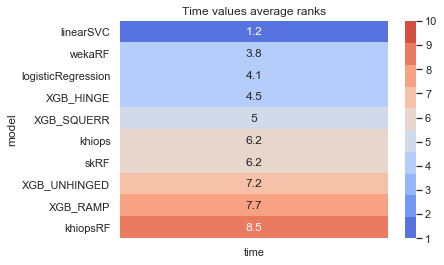

In [44]:
# heatmap of ranks of algorithms ( averaged on all noise values so not really valuable / not used in report )

metrics = {
    "Test" : ["test_rocauc", "test_bacc", "test_kappa"], 
    "Train" : ["train_rocauc", "train_bacc", "train_kappa"],
    "Time" : ["time"]
}

ranks = results.set_index("model").groupby(["name", "i", "rho"]).rank().groupby("model").mean().round(1)
pal = sns.color_palette("coolwarm", len(ranks.index))
for m, ms in metrics.items():
    ranks = ranks.sort_values(ms)
    sns.heatmap(ranks[ms], annot=True, cmap=pal, vmin=1, vmax=len(ranks.index)).set_title('{} values average ranks'.format(m))
    plt.show()

In [40]:
# constants - plots of absolute average performances along with noise addition

palette = {"khiops":"darkorange", "khiopsRF":"darkorange","skRF":"cornflowerblue","logisticRegression":"limegreen", "linearSVC":"limegreen", "XGB_SQUERR":"brown", "XGB_HINGE":"brown", "XGB_RAMP":"brown", "XGB_UNHINGED":"brown", "wekaRF":"cornflowerblue"}
margin = .2
ep = 0.005
min_rho, max_rho = 0, 1
r_ep = lambda : random.random()/10000 # random value, close to 0, to avoid lables perfect overlaping
adjust_params = {"only_move":{'points':'xy', 'text':'y', 'objects':'xy'}, "autoalign":False}

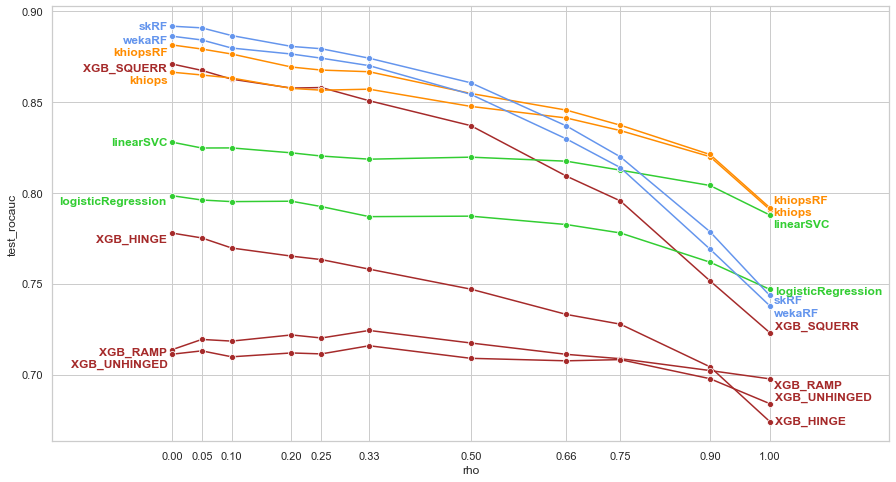

In [41]:
# averaged on all datasets
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x="rho", y="test_rocauc", hue="model", marker="o", data=results[results["rho"]<=1.0], ci=None, palette=palette, legend=None)

ax.set_xlim(min_rho-margin, max_rho+margin)
mean = results.groupby(["rho", "model"]).mean()
lefttexts, righttexts = [], []
for m, mcol in palette.items():
    textprop = {"color":mcol, "verticalalignment":"center", "fontweight": "semibold"}
    lefttexts.append(ax.text(max_rho+ep, mean.T[max_rho, m].T["test_rocauc"]+r_ep(), m, **textprop))
    righttexts.append(ax.text(min_rho-ep, mean.T[min_rho, m].T["test_rocauc"]+r_ep(), m, **textprop))

adjust_text(lefttexts, ha="left", **adjust_params)
adjust_text(righttexts, ha="right",**adjust_params)
ax.set_xticks([rho for rho in results["rho"].unique() if min_rho <= rho <= max_rho])
plt.show()

adult_full


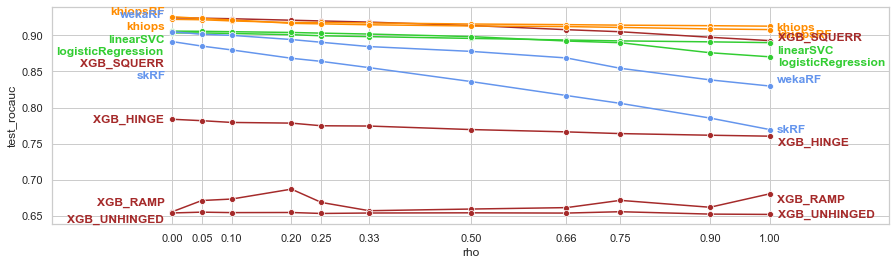

bank_full


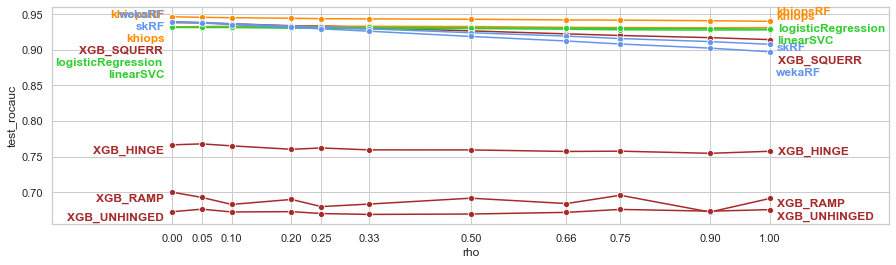

breastcancer_full


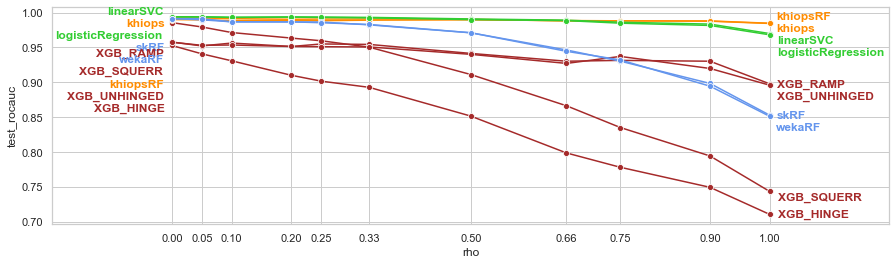

eyestate_full


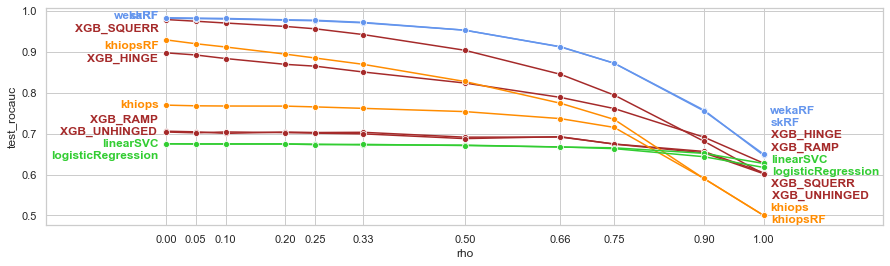

mushroom_full


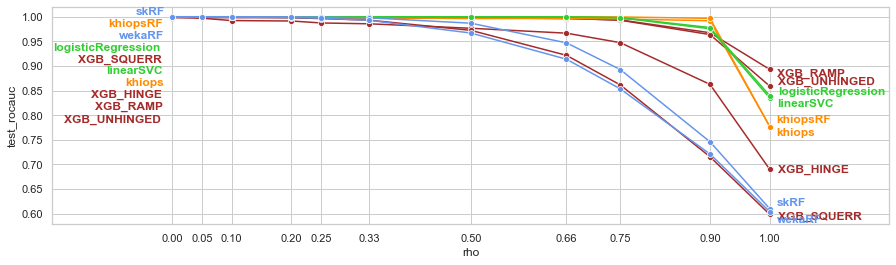

nasa_cm1


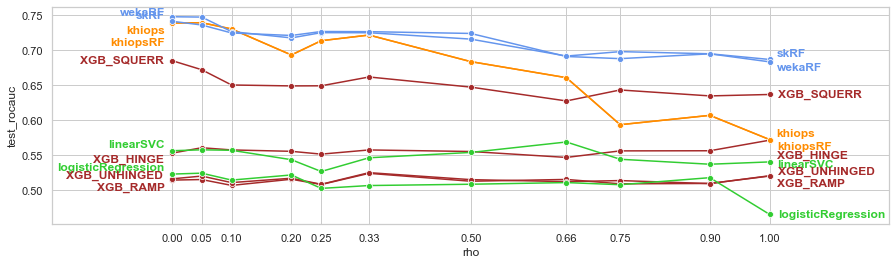

nasa_jm1


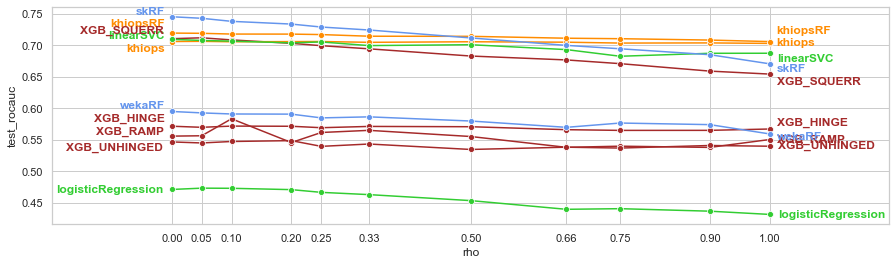

nasa_kc1


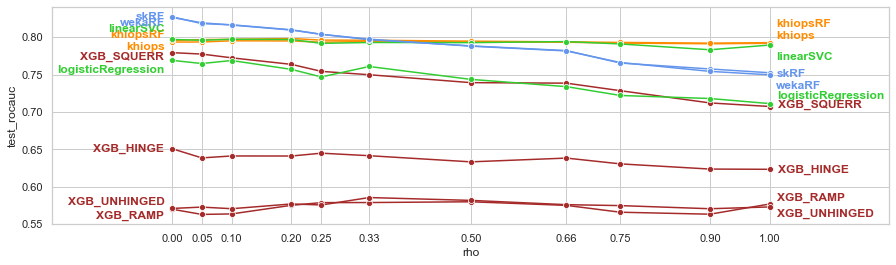

nasa_kc2


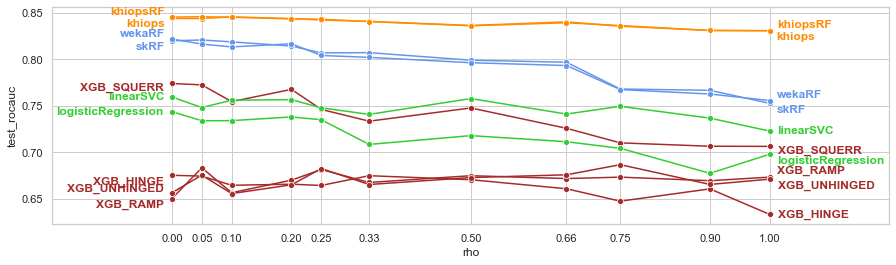

nasa_kc3


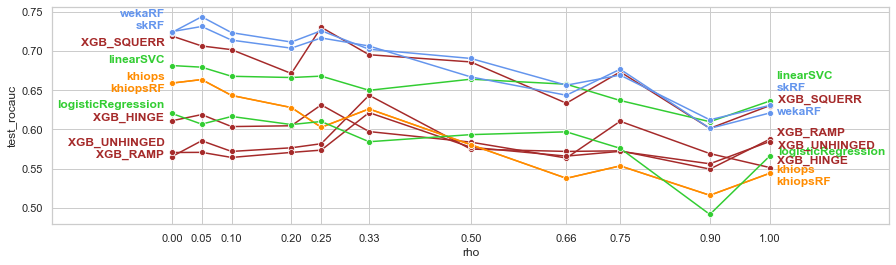

nasa_pc1


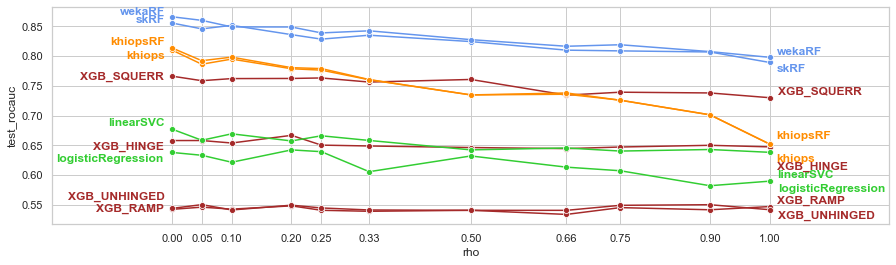

phishing_full


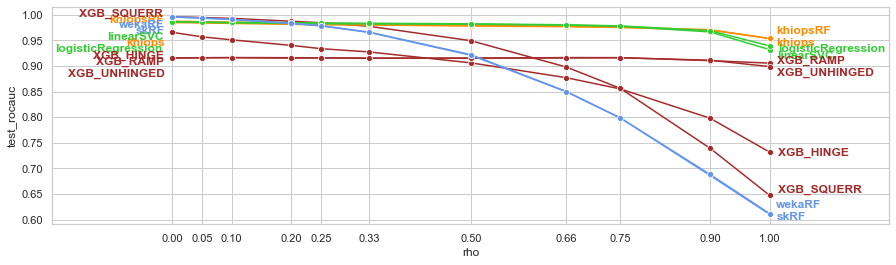

spambase_full


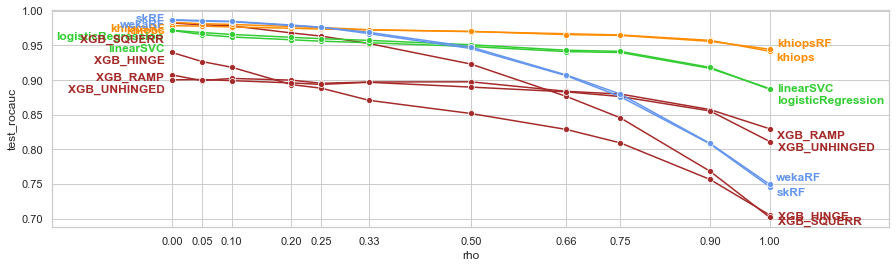

trucks_full


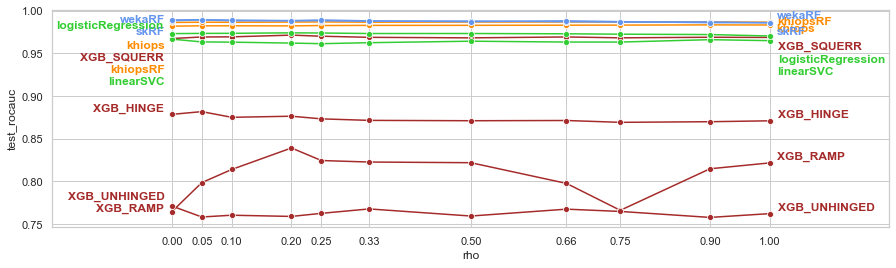


        \begin{figure}[h]
        \makebox[\textwidth][c]{
          \includegraphics[width=1.4\textwidth]{../Figures/mean_results/evo_adult_full}
        }
        \caption{ Impact on performances along with noise addition on adult_full }
        \label{fig:mean_adult_full}
        \end{figure}
        
        \begin{figure}[h]
        \makebox[\textwidth][c]{
          \includegraphics[width=1.4\textwidth]{../Figures/mean_results/evo_bank_full}
        }
        \caption{ Impact on performances along with noise addition on bank_full }
        \label{fig:mean_bank_full}
        \end{figure}
        
        \begin{figure}[h]
        \makebox[\textwidth][c]{
          \includegraphics[width=1.4\textwidth]{../Figures/mean_results/evo_breastcancer_full}
        }
        \caption{ Impact on performances along with noise addition on breastcancer_full }
        \label{fig:mean_breastcancer_full}
        \end{figure}
        
        \begin{figure}[h]
        \makebox[\textwidth][c]{
    

In [42]:
# per dataset, stores to Results_img and automatically generates Latex code to be used (some errors have to be manually corrected)

latex = ""
for dname, dg in results[results["rho"]<=1.0].groupby("name"):
    try: 
        plt.figure(figsize=(15, 4))
        
        ax = sns.lineplot(x="rho", y="test_rocauc", hue="model", marker="o", data=dg, ci=None, palette=palette, legend=None)
        margin = .2
        ax.set_xlim(0-margin, 1+margin)
        ep = 0.01
        mean = dg.groupby(["rho", "model"]).mean()
        lefttexts, righttexts = [], []
        for m, mcol in palette.items():
            textprop = {"color":mcol, "verticalalignment":"center", "fontweight": "semibold"}
            lefttexts.append(ax.text(max_rho+ep, mean.T[max_rho, m].T["test_rocauc"]+r_ep(), m, **textprop))
            righttexts.append(ax.text(min_rho-ep, mean.T[min_rho, m].T["test_rocauc"]+r_ep(), m, **textprop))

        adjust_text(lefttexts, ha="left", **adjust_params)
        adjust_text(righttexts, ha="right",**adjust_params)
        ax.set_xticks([rho for rho in results["rho"].unique() if min_rho <= rho <= max_rho])
        print(dname)
        plt.savefig("./Results_img/evo_{}.eps".format(dname), format="eps")
        latex += """
        \\begin{{figure}}[h]
        \\makebox[\\textwidth][c]{{
          \\includegraphics[width=1.4\\textwidth]{{../Figures/mean_results/evo_{}}}
        }}
        \\caption{{ {} }}
        \\label{{fig:mean_{}}}
        \\end{{figure}}
        """.format(dname, "Impact on performances along with noise addition on {}".format(dname), dname)
        plt.show()
    except Exception:
        pass
print(latex)

XGB_HINGE


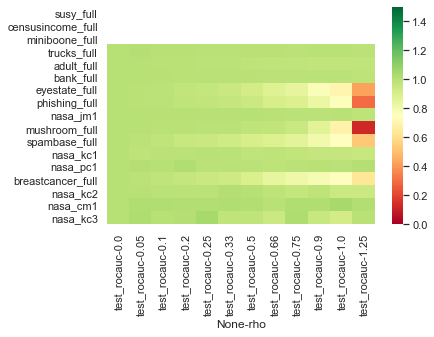

XGB_RAMP


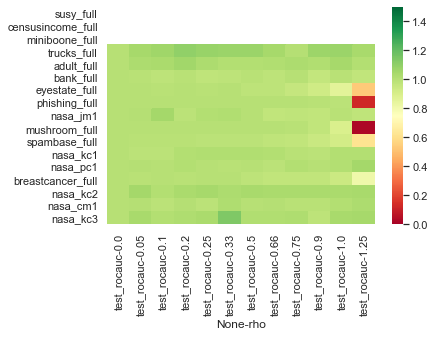

XGB_SQUERR


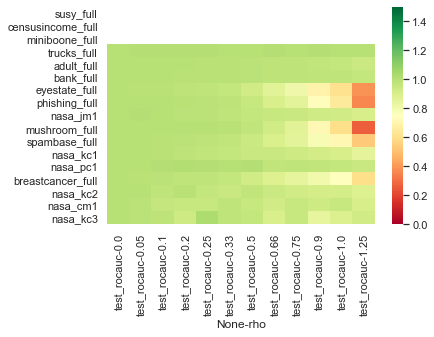

XGB_UNHINGED


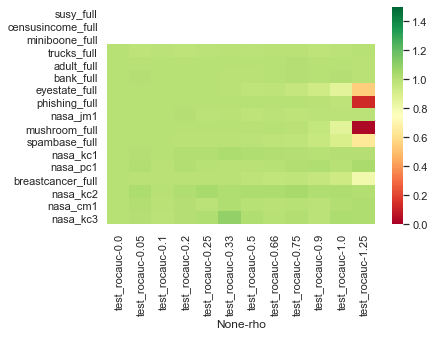

khiops


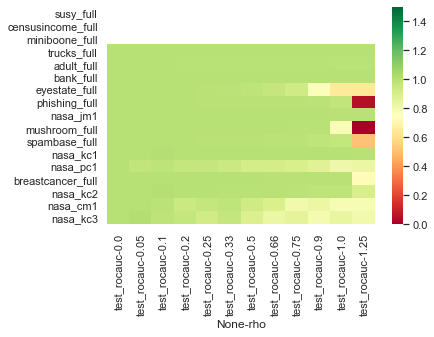

khiopsRF


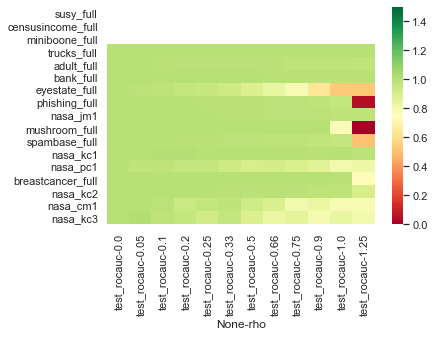

linearSVC


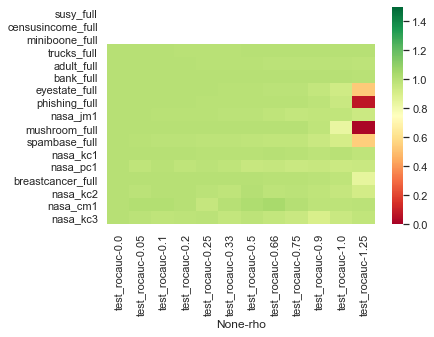

logisticRegression


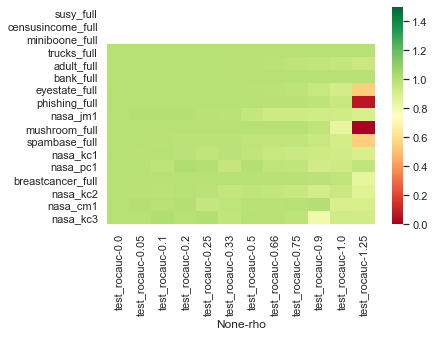

skRF


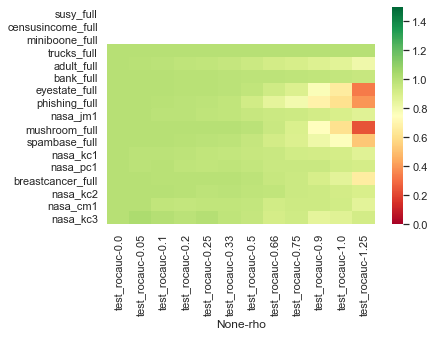

wekaRF


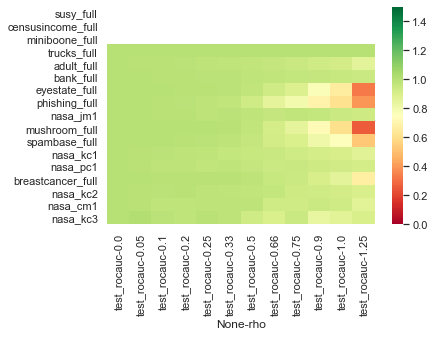

In [117]:
# heat map of perf kept with respect to noise applied / size of dataset for reach model

metric = "test_rocauc"
order = CARACS.sort_values(by="length", ascending=False).index
for i, (model, g) in enumerate(perfkept.groupby("model")):
    print(model)
    pk = g.groupby(["name", "rho"])[metric].mean()
    sns.heatmap(pd.DataFrame(pk).unstack(level=-1).reindex(order), cmap="RdYlGn", vmax=1.5, vmin=0)
    plt.show()

In [102]:
CARACS

,length,columns,cells,num_columns,cat_columns,mean_cat_outcomes,columns_w_missing_values,missing_values_percent,minority_balance_percent
adult_full,48842,13,634946,5,8,12.750000,0,0,23.928177
bank_full,41188,20,823760,10,10,5.300000,0,0,11.265417
breastcancer_full,699,9,6291,9,0,NaN,0,0,34.477825
censusincome_full,299285,40,11971400,12,28,13.785714,0,0,6.204120
eyestate_full,14980,14,209720,14,0,NaN,0,0,44.879840
miniboone_full,130064,50,6503200,50,0,NaN,0,0,28.062339
mushroom_full,8416,22,185152,0,22,5.318182,0,0,46.673004
nasa_cm1,498,21,10458,21,0,NaN,0,0,9.839357
nasa_jm1,10885,21,228585,16,5,286.800000,0,0,19.347726
nasa_kc1,2109,21,44289,21,0,NaN,0,0,15.457563
